<a href="https://colab.research.google.com/github/gilgarad/deep_learning/blob/master/code_tests/AutoEncoderTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 참조: https://keraskorea.github.io/posts/2018-10-23-keras_autoencoder/
# This is mostly copied from someone else, the purpose is to understand and test (could be changed a bit)

In [0]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model

from keras import regularizers

from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
import keras.backend.tensorflow_backend as K

import numpy as np

# Matplotlib 사용
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
      
# Make all data to be between 0 to 1 
x_train = x_train / 255
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test / 255
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

print('Changed Shape (Flattened shape and normalize data as between 0 to 1)')
print(x_train.shape)
print(x_test.shape)

In [0]:

class AutoEncoderTester:
    def __init__(self, model):
        
        self.model = model
       
    def train(self, x_train, y_train, x_test, y_test, epochs=50, batch_size=256, 
              verbose=1):
        self.model.autoencoder.fit(x_train, y_train, 
                                   validation_data=(x_test, y_test), 
                                   epochs=epochs, batch_size=batch_size, 
                                   shuffle=True, 
                                   verbose=verbose)
        
    def test(self, x_test):
        encoded_imgs = self.model.encoder.predict(x_test)
        decoded_imgs = self.model.decoder.predict(encoded_imgs)
        
        n = 10  # 몇 개의 숫자를 나타낼 것인지
        plt.figure(figsize=(20, 4))
        for i in range(n):
            # 원본 데이터
            ax = plt.subplot(2, n, i + 1)
            plt.imshow(x_test[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            # 재구성된 데이터
            ax = plt.subplot(2, n, i + 1 + n)
            plt.imshow(decoded_imgs[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()

In [0]:
class BaseModel:
    def __init__(self):
        encode_dim = 32

        inputs = Input(shape=(784, ))
        encoded = Dense(encode_dim, activation='relu')(inputs)
        decoded = Dense(784, activation='sigmoid')(encoded)

        autoencoder = Model(inputs=inputs, outputs=decoded)


        encoder = Model(inputs=inputs, outputs=encoded)

        encoded_inputs = Input(shape=(encode_dim, ))
        decoder_layer = autoencoder.layers[-1]
        decoder = Model(inputs=encoded_inputs, outputs=decoder_layer(encoded_inputs))


        autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
        
        self.encoder = encoder
        self.decoder = decoder
        self.autoencoder = autoencoder

60000/60000 [==============================] - 4s 65us/step - loss: 0.1144 - val_loss: 0.1126
Epoch 133/200
60000/60000 [==============================] - 4s 66us/step - loss: 0.1142 - val_loss: 0.1124
Epoch 134/200
60000/60000 [==============================] - 4s 66us/step - loss: 0.1139 - val_loss: 0.1121
Epoch 135/200
60000/60000 [==============================] - 4s 66us/step - loss: 0.1137 - val_loss: 0.1119
Epoch 136/200
60000/60000 [==============================] - 4s 66us/step - loss: 0.1134 - val_loss: 0.1116
Epoch 137/200
60000/60000 [==============================] - 4s 67us/step - loss: 0.1132 - val_loss: 0.1114
Epoch 138/200
60000/60000 [==============================] - 4s 67us/step - loss: 0.1130 - val_loss: 0.1112
Epoch 139/200
60000/60000 [==============================] - 4s 65us/step - loss: 0.1127 - val_loss: 0.1109
Epoch 140/200
60000/60000 [==============================] - 4s 65us/step - loss: 0.1125 - val_loss: 0.1107
Epoch 141/200
60000/60000 [===============

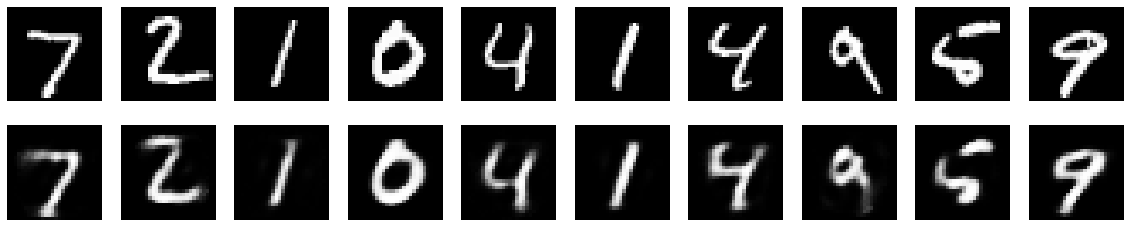

In [42]:
base_model = AutoEncoderTester(model=BaseModel())
base_model.train(x_train=x_train, y_train=x_train, x_test=x_test, y_test=x_test,
                epochs=200, batch_size=1024, verbose=1)
base_model.test(x_test=x_test)


In [0]:
class RegularizedModel:
    def __init__(self):
        encoding_dim = 32

        inputs = Input(shape=(784,))
        # L1 activity regularizer를 Dense layer에 추가 
        encoded = Dense(encoding_dim, activation='relu',
                        activity_regularizer=regularizers.l1(10e-5))(inputs)
        decoded = Dense(784, activation='sigmoid')(encoded)

        autoencoder = Model(inputs, decoded)
        
        encoder = Model(inputs=inputs, outputs=encoded)

        encoded_inputs = Input(shape=(encode_dim, ))
        decoder_layer = autoencoder.layers[-1]
        decoder = Model(inputs=encoded_inputs, outputs=decoder_layer(encoded_inputs))


        autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
        
        self.encoder = encoder
        self.decoder = decoder
        self.autoencoder = autoencoder

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 5s 78us/step - loss: 0.7095 - val_loss: 0.6826
Epoch 2/200
60000/60000 [==============================] - 4s 69us/step - loss: 0.6765 - val_loss: 0.6704
Epoch 3/200
60000/60000 [==============================] - 4s 70us/step - loss: 0.6648 - val_loss: 0.6591
Epoch 4/200
60000/60000 [==============================] - 4s 70us/step - loss: 0.6538 - val_loss: 0.6483
Epoch 5/200
60000/60000 [==============================] - 4s 70us/step - loss: 0.6431 - val_loss: 0.6378
Epoch 6/200
60000/60000 [==============================] - 4s 72us/step - loss: 0.6328 - val_loss: 0.6277
Epoch 7/200
60000/60000 [==============================] - 4s 71us/step - loss: 0.6229 - val_loss: 0.6180
Epoch 8/200
60000/60000 [==============================] - 4s 71us/step - loss: 0.6134 - val_loss: 0.6087
Epoch 9/200
60000/60000 [==============================] - 4s 71us/step - loss: 0.6042 - val_loss: 0.5

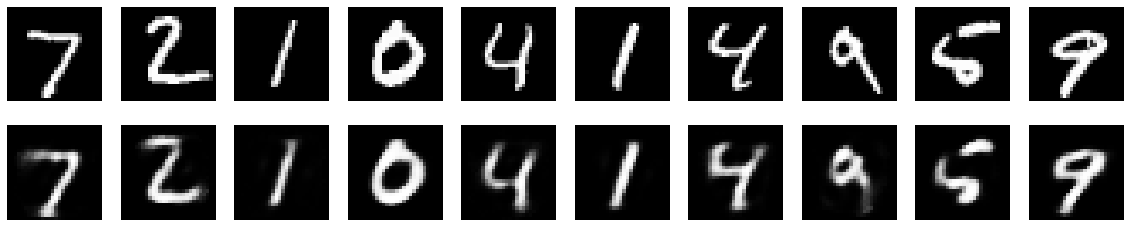

In [43]:
regularized_model = AutoEncoderTester(RegularizedModel())
regularized_model.train(x_train=x_train, y_train=x_train, x_test=x_test, y_test=x_test,
                epochs=200, batch_size=1024, verbose=1)
regularized_model.test(x_test=x_test)

In [0]:
class DeepModel:
    def __init__(self):
        encoding_dim = 32

        inputs = Input(shape=(784,))
        encoded = Dense(128, activation='relu')(inputs)
        encoded = Dense(64, activation='relu')(encoded)
        encoded = Dense(32, activation='relu')(encoded)

        decoded = Dense(64, activation='relu')(encoded)
        decoded = Dense(128, activation='relu')(decoded)
        decoded = Dense(784, activation='sigmoid')(decoded)

        autoencoder = Model(inputs, decoded)
        
        encoder = Model(inputs=inputs, outputs=encoded)

        encoded_inputs = Input(shape=(encode_dim, ))
        decoder_layer = autoencoder.layers[-1]
        decoder = Model(inputs=encoded_inputs, outputs=decoder_layer(encoded_inputs))


        autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
        
        self.encoder = encoder
        self.decoder = decoder
        self.autoencoder = autoencoder

In [45]:
deep_model = AutoEncoderTester(DeepModel())
deep_model.train(x_train=x_train, y_train=x_train, x_test=x_test, y_test=x_test,
                epochs=200, batch_size=1024, verbose=1)
deep_model.test(x_test=x_test)

ValueError: ignored

In [0]:
class ConvModel:
    def __init__(self):
        encoding_dim = 32

        inputs = Input(shape=(28, 28, 1))  # 'channels_firtst'이미지 데이터 형식을 사용하는 경우 이를 적용

        x = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
        x = MaxPooling2D((2, 2), padding='same')(x)
        x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
        x = MaxPooling2D((2, 2), padding='same')(x)
        x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
        encoded = MaxPooling2D((2, 2), padding='same')(x)

        # 이 시점에서 표현(representatoin)은 (4,4,8) 즉, 128 차원

        x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
        x = UpSampling2D((2, 2))(x)
        x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
        x = UpSampling2D((2, 2))(x)
        x = Conv2D(16, (3, 3), activation='relu')(x)
        x = UpSampling2D((2, 2))(x)
        decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

        autoencoder = Model(inputs, decoded)
        
        encoder = Model(inputs=inputs, outputs=encoded)

        encoded_inputs = Input(shape=(encode_dim, ))
        decoder_layer = autoencoder.layers[-1]
        decoder = Model(inputs=encoded_inputs, outputs=decoder_layer(encoded_inputs))


        autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
        
        self.encoder = encoder
        self.decoder = decoder
        self.autoencoder = autoencoder

In [0]:
# Reshape for conv2d
x_train_3d = np.reshape(x_train, (len(x_train), 28, 28, 1))  # 'channels_firtst'이미지 데이터 형식을 사용하는 경우 이를 적용
x_test_3d = np.reshape(x_test, (len(x_test), 28, 28, 1))  # 'channels_firtst'이미지 데이터 형식을 사용하는 경우 이를 적용

conv_model = AutoEncoderTester(ConvModel())
conv_model.train(x_train=x_train_3d, y_train=x_train_3d, x_test=x_test_3d, y_test=x_test_3d,
                epochs=200, batch_size=1024, verbose=1)
conv_model.test(x_test=x_test_3d)